# Lecture 8: Regression
ENVR 890-001: Python for Environmental Research, Fall 2020

October 16, 2020

By Andrew Hamilton.

### Summary
Linear regression is ubiquitous across a wide range of science, engineering, and public health applications. This is not a statistics class, so we won't spend much time on the theory. Rather, we will focus on implementing linear regression and related concepts in Python. However, you should absolutely learn some statistics (or consult with an expert) before using these concepts in your research! 

### Read in our data

I downloaded from the [EPA Acid Rain emissions reporting database](https://ampd.epa.gov/ampd/). This dataset contains statewide quarterly emissions of SO2, NOx, and CO2 from eligible coal plants in NC and SC from 1997-2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

df = pd.read_csv('NC_SC_acid_rain_emissions.csv', sep=',', header=1)
df.columns = ['state', 'year', 'quarter', 'program', 'so2', 'nox', 'co2', 'heatinput']
df

,state,year,quarter,program,so2,nox,co2,heatinput
0,NC,2017,1,ARP,3088.057,6627.984,1.177807e+07,1.439023e+08
1,NC,2017,2,ARP,3771.224,7770.051,1.259458e+07,1.495152e+08
2,NC,2017,3,ARP,6054.505,10265.869,1.707442e+07,2.002756e+08
3,NC,2017,4,ARP,3307.317,7532.182,1.140865e+07,1.421079e+08
4,NC,2018,1,ARP,3930.952,8266.694,1.362151e+07,1.649823e+08
...,...,...,...,...,...,...,...,...
185,SC,2015,4,ARP,1274.022,2197.494,6.405202e+06,7.870638e+07
186,SC,2016,1,ARP,2079.528,2809.411,7.043278e+06,8.058031e+07
187,SC,2016,2,ARP,1954.405,2613.211,7.139541e+06,8.186110e+07
188,SC,2016,3,ARP,2521.992,3559.830,9.782372e+06,1.142828e+08


**Scatterplot to look at data, NOx vs year**

<AxesSubplot:xlabel='year', ylabel='nox'>

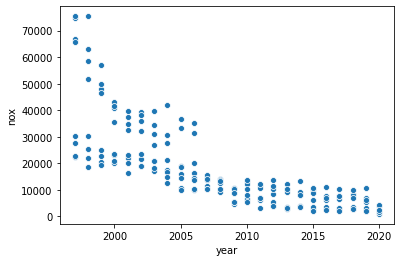

In [2]:
sns.scatterplot('year', 'nox', data=df)

### Linear regression, NOx against year

In general, we can write linear regression as:

$$y_i = \beta_0 + \beta_1 x_{i1} + ... + \beta_p x_{ip} + \varepsilon_i$$

for all data points $i$ with independent variables (regressors) $\mathbf{x}$ and dependent variable $y$. Ordinary Least Squares (OLS) tries to find the coefficients $\boldsymbol{\beta}$ that minimize the sum of the squared errors, $\boldsymbol{\varepsilon}$.

In the current context, we can simplify this as:

$$NOx_i = \beta_0 + \beta_1 YEAR_{i} + \varepsilon_i$$

where $\beta_0$ is the intercept and $\beta_1$ is the slope of the regression line.

In [3]:
df.head()

,state,year,quarter,program,so2,nox,co2,heatinput
0,NC,2017,1,ARP,3088.057,6627.984,11778066.24,143902340.0
1,NC,2017,2,ARP,3771.224,7770.051,12594579.74,149515188.3
2,NC,2017,3,ARP,6054.505,10265.869,17074422.27,200275610.8
3,NC,2017,4,ARP,3307.317,7532.182,11408654.15,142107926.7
4,NC,2018,1,ARP,3930.952,8266.694,13621514.75,164982269.3


In [4]:
### Define linear regression object, with equation written in quotes (no need to write constant term)
lm_nox_year = sm.ols('nox ~ year', data=df)
lm_nox_year

In [5]:
### run regression
lm_nox_year_fit = lm_nox_year.fit()
lm_nox_year_fit

In [6]:
### print regression summary statistics
print(lm_nox_year_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     283.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.29e-39
Time:                        17:41:19   Log-Likelihood:                -2017.0
No. Observations:                 190   AIC:                             4038.
Df Residuals:                     188   BIC:                             4045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.564e+06   2.11e+05     16.910      0.0

In [7]:
### regression coefficients (betas)
lm_nox_year_fit.params

Intercept    3.564446e+06
year        -1.766318e+03
dtype: float64

In [8]:
### get predicted nox as a function of year based on regression
def predict_nox_year(params, years):
    return params[0] + params[1] * years

In [9]:
years = np.arange(1995, 2021)
prediction = predict_nox_year(lm_nox_year_fit.params, years)
prediction

array([ 4.06404353e+04,  3.88741168e+04,  3.71077983e+04,  3.53414799e+04,
        3.35751614e+04,  3.18088429e+04,  3.00425244e+04,  2.82762060e+04,
        2.65098875e+04,  2.47435690e+04,  2.29772506e+04,  2.12109321e+04,
        1.94446136e+04,  1.76782952e+04,  1.59119767e+04,  1.41456582e+04,
        1.23793398e+04,  1.06130213e+04,  8.84670282e+03,  7.08038435e+03,
        5.31406588e+03,  3.54774741e+03,  1.78142894e+03,  1.51104693e+01,
       -1.75120800e+03, -3.51752647e+03])

Text(0.5, 0, 'Year')

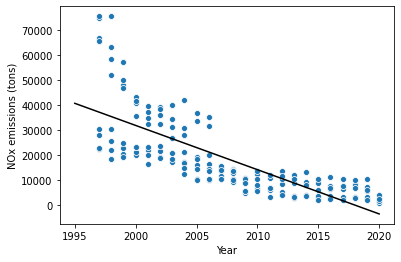

In [10]:
sns.scatterplot('year', 'nox', data=df)
plt.plot(years, prediction, color='k')
plt.ylabel('NOx emissions (tons)')
plt.xlabel('Year')

**Check if regression conditions are met - normality?**

(array([67., 52., 29., 10., 12.,  8.,  4.,  2.,  3.,  3.]),
 array([  947.276 ,  8392.7264, 15838.1768, 23283.6272, 30729.0776,
        38174.528 , 45619.9784, 53065.4288, 60510.8792, 67956.3296,
        75401.78  ]),
 <BarContainer object of 10 artists>)

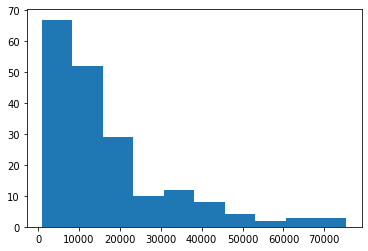

In [11]:
plt.hist(df['nox'])

**Try log transform of data**

In [12]:
df['nox_log'] = np.log(df['nox'])
df.head()

,state,year,quarter,program,so2,nox,co2,heatinput,nox_log
0,NC,2017,1,ARP,3088.057,6627.984,11778066.24,143902340.0,8.799056
1,NC,2017,2,ARP,3771.224,7770.051,12594579.74,149515188.3,8.958032
2,NC,2017,3,ARP,6054.505,10265.869,17074422.27,200275610.8,9.236580
3,NC,2017,4,ARP,3307.317,7532.182,11408654.15,142107926.7,8.926940
4,NC,2018,1,ARP,3930.952,8266.694,13621514.75,164982269.3,9.019990


(array([ 1.,  6., 21., 13., 26., 35., 33., 24., 21., 10.]),
 array([ 6.8535905 ,  7.29129006,  7.72898963,  8.1666892 ,  8.60438876,
         9.04208833,  9.4797879 ,  9.91748746, 10.35518703, 10.79288659,
        11.23058616]),
 <BarContainer object of 10 artists>)

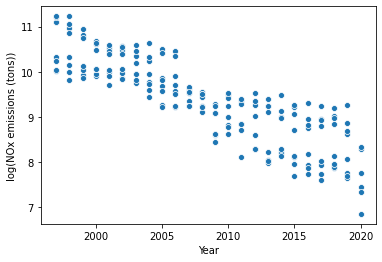

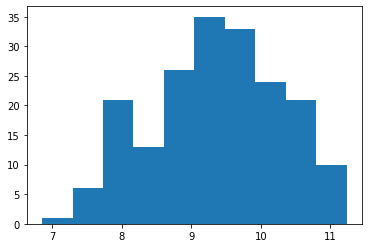

In [13]:
plt.figure()
sns.scatterplot('year', 'nox_log', data=df)
plt.ylabel('log(NOx emissions (tons))')
plt.xlabel('Year')

plt.figure()
plt.hist(df['nox_log'])

**QQ-plot**

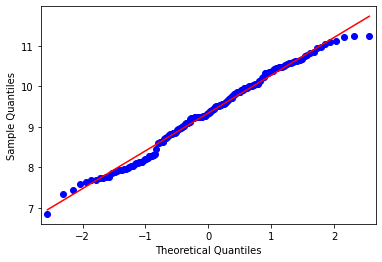

In [14]:
from statsmodels.graphics.gofplots import qqplot
fig = qqplot(df['nox_log'], line='s')

**Test for normality with Shapiro-Wilk test**

In [15]:
from scipy.stats import shapiro
stat, p = shapiro(df['nox_log'])
print(stat, p)

0.9855313897132874 0.048119135200977325


**Try Box-Cox transformation**

In [16]:
from scipy.stats import boxcox
df['nox_bc'], lam = boxcox(df['nox'])
lam

0.06979101291062871

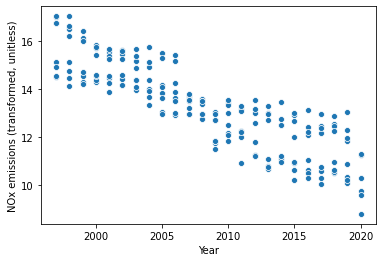

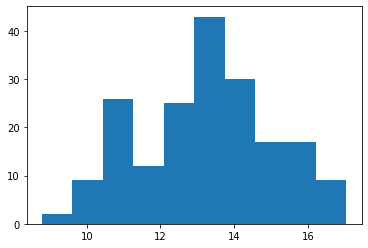

<Figure size 432x288 with 0 Axes>

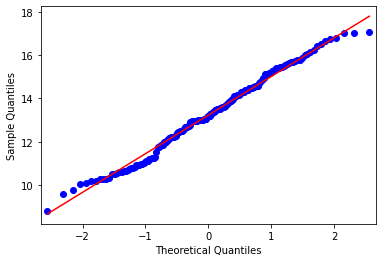

In [17]:
plt.figure()
sns.scatterplot('year', 'nox_bc', data=df)
plt.ylabel('NOx emissions (transformed, unitless)')
plt.xlabel('Year')

plt.figure()
plt.hist(df['nox_bc'])

plt.figure()
fig = qqplot(df['nox_bc'], line='s')

In [18]:
stat, p = shapiro(df['nox_bc'])
print(stat, p)

0.9870161414146423 0.07854940742254257


In [19]:
lm_nox_year = sm.ols('nox_bc ~ year', data=df)
lm_nox_year_fit = lm_nox_year.fit()
print(lm_nox_year_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     574.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.55e-59
Time:                        17:41:21   Log-Likelihood:                -246.62
No. Observations:                 190   AIC:                             497.2
Df Residuals:                     188   BIC:                             503.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    466.9815     18.929     24.670      0.0

Text(0.5, 0, 'Year')

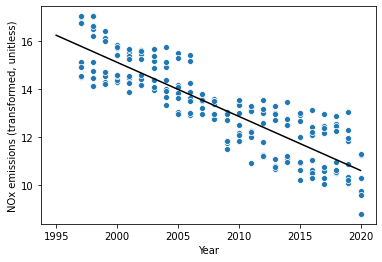

In [20]:
prediction = predict_nox_year(lm_nox_year_fit.params, years)
sns.scatterplot('year', 'nox_bc', data=df)
plt.plot(years, prediction, color='k')
plt.ylabel('NOx emissions (transformed, unitless)')
plt.xlabel('Year')

**Transforming prediction back to original scale**

In [21]:
def box_cox_inverse(x, lam):
    if lam > 0:
        return (x * lam + 1) ** (1 / lam)
    elif lam == 0:
        return np.exp(x)
    else:
        print('Invalid lambda')

In [22]:
prediction_tons = box_cox_inverse(prediction, lam)
prediction_tons

array([52216.590779  , 46953.24555762, 42186.9382547 , 37873.9405973 ,
       33974.08501916, 30450.49838173, 27269.35381267, 24399.63955304,
       21812.94376475, 19483.25430688, 17386.77254423, 15501.7403034 ,
       13808.27914118, 12288.24113698, 10925.07046593,  9703.67505167,
        8610.30763844,  7632.45566018,  6758.73932123,  5978.8173373 ,
        5283.29981864,  4663.66780818,  4112.19901692,  3621.89932696,
        3186.43965874,  2800.09782425])

Text(0.5, 0, 'Year')

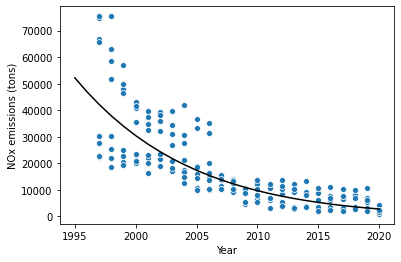

In [23]:
sns.scatterplot('year', 'nox', data=df)
plt.plot(years, prediction_tons, color='k')
plt.ylabel('NOx emissions (tons)')
plt.xlabel('Year')

**Check for homoskedasticity**

<AxesSubplot:xlabel='year'>

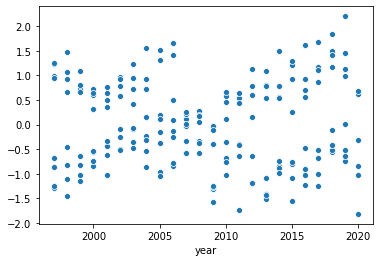

In [24]:
resids = lm_nox_year_fit.resid
sns.scatterplot(df['year'], resids)

**Account for state differences**

<AxesSubplot:xlabel='year', ylabel='nox_bc'>

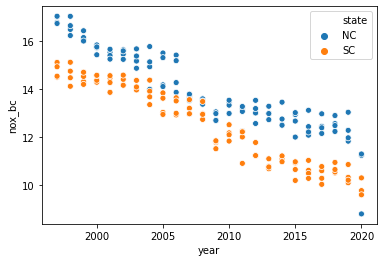

In [25]:
sns.scatterplot('year', 'nox_bc', data=df, hue = 'state')

Now we want to add an additional regressor, so that our regression reads:

$$NOx_i = \beta_0 + \beta_1 YEAR_{i}  + \beta_2 IS\_SC_i + \varepsilon_i$$

where $\beta_0$ is the intercept, $\beta_1$ is the slope with respect to year, and $\beta_2$ is a constant shift if the observation comes from SC.

In [26]:
lm_nox_year_state = sm.ols('nox_bc ~ year + state', data=df)
lm_nox_year_state_fit = lm_nox_year_state.fit()
print(lm_nox_year_state_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1073.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.36e-103
Time:                        17:41:21   Log-Likelihood:                -139.91
No. Observations:                 190   AIC:                             285.8
Df Residuals:                     187   BIC:                             295.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     467.7094     10.824     43.212      

In [27]:
def predict_nox_year_state(params, years, SC_binary):
    return params[0] + params[1] * SC_binary + params[2] * years

In [28]:
years = np.arange(1995, 2021)
SC_isSC = np.ones(len(years))
NC_isSC = np.zeros(len(years))
prediction_SC = predict_nox_year_state(lm_nox_year_state_fit.params, years, SC_isSC)
prediction_NC = predict_nox_year_state(lm_nox_year_state_fit.params, years, NC_isSC)

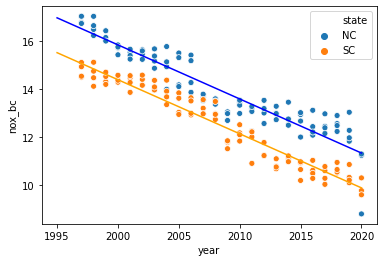

In [29]:
sns.scatterplot('year', 'nox_bc', data=df, hue='state')
plt.plot(years, prediction_SC, color='orange')
plt.plot(years, prediction_NC, color='blue')

Text(0.5, 0, 'Year')

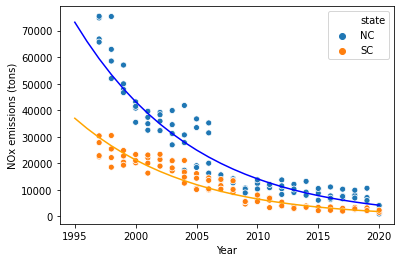

In [30]:
prediction_tons_SC = box_cox_inverse(prediction_SC, lam)
prediction_tons_NC = box_cox_inverse(prediction_NC, lam)
sns.scatterplot('year', 'nox', data=df, hue='state')
plt.plot(years, prediction_tons_SC, color='orange')
plt.plot(years, prediction_tons_NC, color='blue')
plt.ylabel('NOx emissions (tons)')
plt.xlabel('Year')

**Interaction effects**

In [31]:
lm_nox_year_state_int = sm.ols('nox_bc ~ year*state', data=df)
lm_nox_year_state_int_fit = lm_nox_year_state_int.fit()
print(lm_nox_year_state_int_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     715.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.27e-102
Time:                        17:41:22   Log-Likelihood:                -139.36
No. Observations:                 190   AIC:                             286.7
Df Residuals:                     186   BIC:                             299.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          456.4890     15.304  

**Interaction is not significant in this case, but let's visualize model anyway**

In [32]:
def predict_nox_year_state_int(params, years, SC_binary):
    return params[0] + params[1] * SC_binary + params[2] * years + params[3] * SC_binary * years

In [33]:
prediction_SC = predict_nox_year_state_int(lm_nox_year_state_int_fit.params, years, SC_isSC)
prediction_NC = predict_nox_year_state_int(lm_nox_year_state_int_fit.params, years, NC_isSC)

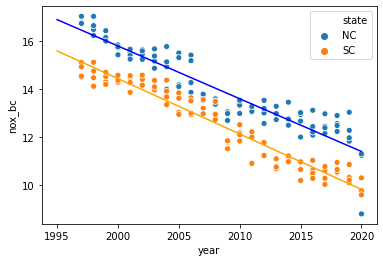

In [34]:
sns.scatterplot('year', 'nox_bc', data=df, hue='state')
plt.plot(years, prediction_SC, color='orange')
plt.plot(years, prediction_NC, color='blue')

**Check for quarterly effects?**

In [35]:
df.head()

,state,year,quarter,program,so2,nox,co2,heatinput,nox_log,nox_bc
0,NC,2017,1,ARP,3088.057,6627.984,11778066.24,143902340.0,8.799056,12.150325
1,NC,2017,2,ARP,3771.224,7770.051,12594579.74,149515188.3,8.958032,12.445746
2,NC,2017,3,ARP,6054.505,10265.869,17074422.27,200275610.8,9.236580,12.971333
3,NC,2017,4,ARP,3307.317,7532.182,11408654.15,142107926.7,8.926940,12.387710
4,NC,2018,1,ARP,3930.952,8266.694,13621514.75,164982269.3,9.019990,12.561771


<AxesSubplot:xlabel='year', ylabel='nox_bc'>

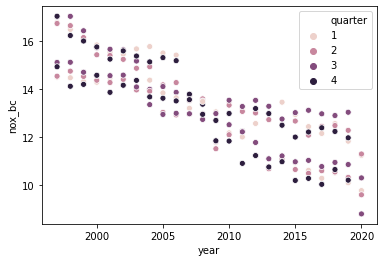

In [36]:
sns.scatterplot('year', 'nox_bc', data=df, hue='quarter')

In [37]:
lm_nox_year_state_q = sm.ols('nox_bc ~ year + state + quarter', data=df)
lm_nox_year_state_q_fit = lm_nox_year_state_q.fit()
print(lm_nox_year_state_q_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     716.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          6.50e-102
Time:                        17:41:22   Log-Likelihood:                -139.25
No. Observations:                 190   AIC:                             286.5
Df Residuals:                     186   BIC:                             299.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     468.1001     10.820     43.261      

**Probably don't want quarter as an integer (implies linear relationship between seasons). Let's redo as categorical.**

In [38]:
df['quarter_cat'] = [str(q) for q in df['quarter']]
type(df['quarter_cat'][0])

str

In [39]:
lm_nox_year_state_q = sm.ols('nox_bc ~ year + state + quarter_cat', data=df)
lm_nox_year_state_q_fit = lm_nox_year_state_q.fit()
print(lm_nox_year_state_q_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     439.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.18e-100
Time:                        17:41:22   Log-Likelihood:                -136.47
No. Observations:                 190   AIC:                             284.9
Df Residuals:                     184   BIC:                             304.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          468.3186     10.722  

**ANOVA test for difference in mean between NC vs SC**

<AxesSubplot:xlabel='state', ylabel='nox_bc'>

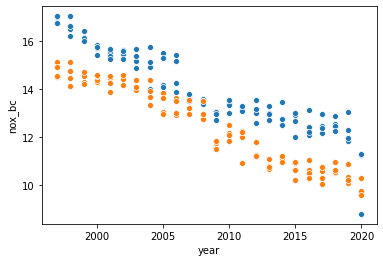

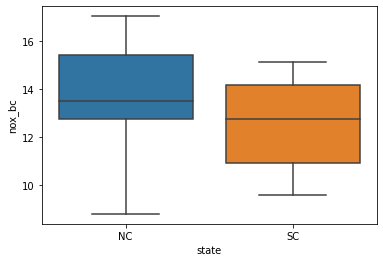

In [40]:
## For ANOVA test we need to separate samples
df_nc = df.loc[df['state'] == 'NC', :]
df_sc = df.loc[df['state'] == 'SC', :]
plt.figure()
sns.scatterplot(df_nc['year'], df_nc['nox_bc'])
sns.scatterplot(df_sc['year'], df_sc['nox_bc'])
plt.figure()
sns.boxplot('state', 'nox_bc', data=df)

In [41]:
## ANOVA test
from scipy.stats import f_oneway

f_oneway(df_nc['nox_bc'], df_sc['nox_bc'])

F_onewayResult(statistic=37.51228177961962, pvalue=5.197934502526843e-09)

**Test for difference in mean between quarters in NC**

<AxesSubplot:xlabel='quarter', ylabel='nox_bc'>

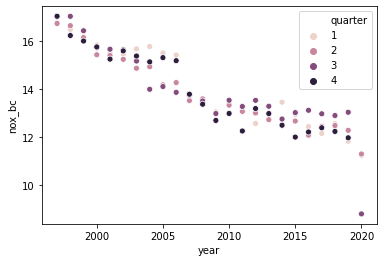

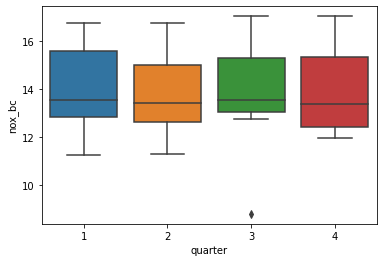

In [42]:
plt.figure()
sns.scatterplot('year', 'nox_bc', data=df_nc, hue='quarter')
plt.figure()
sns.boxplot('quarter', 'nox_bc', data=df_nc)

In [43]:
df_nc_q1 = df_nc.loc[df_nc['quarter'] == 1, :]
df_nc_q2 = df_nc.loc[df_nc['quarter'] == 2, :]
df_nc_q3 = df_nc.loc[df_nc['quarter'] == 3, :]
df_nc_q4 = df_nc.loc[df_nc['quarter'] == 4, :]

f_oneway(df_nc_q1['nox_bc'], df_nc_q2['nox_bc'], df_nc_q3['nox_bc'], df_nc_q4['nox_bc'])

F_onewayResult(statistic=0.09676903132215894, pvalue=0.9616321455374468)

### In-class exercise
Run a regression to test whether there has been a statistically significant reduction in reported CO2 emissions in North Carolina (note: this only comes from a subset of coal plants, not a full picture of CO2 emissions). Perform any statistical checks & transformations if necessary.

### Data smoothing 

<AxesSubplot:xlabel='year', ylabel='so2'>

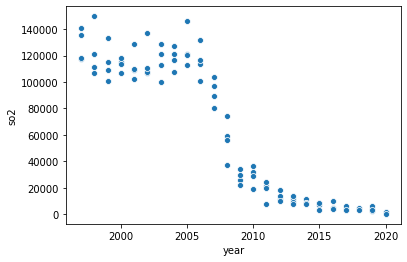

In [44]:
sns.scatterplot('year','so2', data=df_nc)

**Simple smoothing - line segments through means of each year**

In [45]:
df_nc_yearly = df_nc.groupby('year').mean()
df_nc_yearly

,quarter,so2,nox,co2,heatinput,nox_log,nox_bc
year,,,,,,,
1997,2.5,127989.569250,70669.34550,1.891000e+07,1.846805e+08,11.163785,16.901895
1998,2.5,122145.952750,62181.96625,1.840558e+07,1.803841e+08,11.028650,16.609806
1999,2.5,114485.645250,50356.93975,1.824346e+07,1.787225e+08,10.823826,16.169793
2000,2.5,113360.592750,40214.40225,1.851418e+07,1.817438e+08,10.599301,15.695576
2001,2.5,112621.635000,36084.66050,1.770498e+07,1.739513e+08,10.490887,15.469261
2002,2.5,115748.281250,36426.42525,1.821641e+07,1.807777e+08,10.500311,15.488872
2003,2.5,115510.188250,33165.90575,1.796947e+07,1.772706e+08,10.399083,15.280033
2004,2.5,118080.042000,29430.57625,1.822001e+07,1.798254e+08,10.242635,14.964076
2005,2.5,125233.896750,26937.31225,1.889529e+07,1.871322e+08,10.152503,14.780413


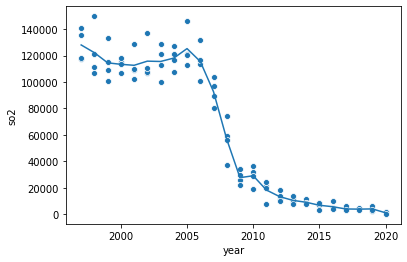

In [46]:
sns.scatterplot('year','so2', data=df_nc)
plt.plot(df_nc_yearly.index, df_nc_yearly['so2'])

**Lowess smoothing**

In [47]:
from statsmodels.nonparametric.smoothers_lowess import lowess

## fraction of data to use for each smoothed value (b/w 0 and 1, default is 0.67)
lowess_frac = 0.2

## get smoothed points
smooth = lowess(df_nc['so2'], df_nc['year'], frac=lowess_frac)
index_smooth, so2_smooth = np.transpose(smooth)

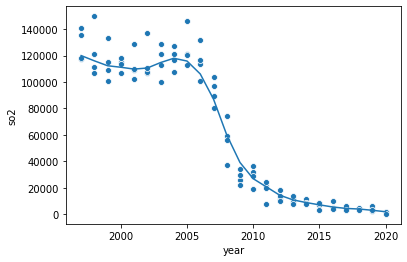

In [48]:
sns.scatterplot('year','so2', data=df_nc)
plt.plot(index_smooth, so2_smooth)